In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Input image dimensions
img_rows, img_cols = 32, 32
num_classes = 2
#The data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
y_train = np.array(y_train[train_picks]==5,dtype=int)
x_train = x_train[train_picks]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    
x_train = x_train.astype('float32')
x_train /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

#Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
print('y_train shape:', y_train.shape)

170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (10000, 32, 32, 3)
10000 train samples
y_train shape: (10000, 2)


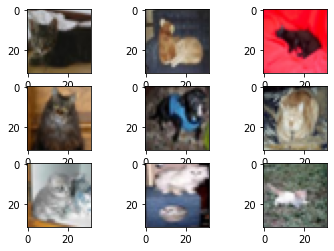

In [ ]:
#Look at the first 9 images from the dataset
images = range(0,9)
for i in images:
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    
#Show the plot
plt.show()

In [ ]:
#Its a dog image
y_train[7000]

array([0., 1.], dtype=float32)

In [ ]:
from keras import models
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D,MaxPooling2D
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator
from keras import layers

In [ ]:
#@title Loading Dev and test set

In [ ]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

ie_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02123045")# Cats synset
print(ie_page.content)
ie_soup = BeautifulSoup(ie_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
ae_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02084071")# Dogs synset
print(ae_page.content)
ae_soup = BeautifulSoup(ae_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

b'\n<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"\n   "http://www.w3.org/TR/html4/loose.dtd">\n\n<html lang="en">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<title>ImageNet</title>\n<script src="https://www.google.com/recaptcha/api.js"></script>\n<link rel="stylesheet" type="text/css" href="/static_files/style.css">\n<link rel="shortcut icon" href="/static_files/favicon.ico">\n<link rel="icon" href="/static_files/favicon.png" type="image/png">\n<script language="JavaScript" src="/static_files/index_files/dropdownmenu.js">\n</script>\n<script type="text/javascript" language="javascript" src="/gpviewui/gpviewui.nocache.js"></script>\n<link type="text/css" rel="stylesheet" href="/GPViewUI.css">\n<script type="text/javascript"> function showemail(d,u)\n{\n  var email = u + "@" + d;\n  document.write("<a href=mailto:"+email+">"+email+"</a>");\n}\n</script>\n<script type="text/javascript"\n  src="http://cdn.mathjax.org/mathjax/latest/MathJa

In [ ]:
#Creating Dataframe 
!mkdir /content/catdog_dev/ 
!mkdir /content/catdog_test/

In [ ]:
#Defining function to convert URL to images 
img_rows, img_cols = 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [ ]:
n_of_training_images=50   #The number of Development images to use
counter=0
for progress in range(10*n_of_training_images):#store all 200 INDIAN ELEPHANT images on a directory
    if (counter == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not ie_split_urls[progress] == None:
      try:
        I = url_to_image(ie_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_dev/ie.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count :",counter)
      except:
        None
print("\n ALL THE DEV SET CATS- IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,counter)

counter=0
for progress in range(10*n_of_training_images):#store all 200 AFRICAN ELEPHANT images on a directory
    if (counter == n_of_training_images):
      break 
    if (progress%10==0):
        print(progress)
    if not ae_split_urls[progress] == None:
      try:
        I = url_to_image(ae_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_dev/ae.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count :",counter)

      except:
        None
print("\n ALL THE DEV SET -DOGS IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,counter)

In [ ]:
# Path to the train folder
import os
original_train = '/content/catdog_dev/'
 
filenames = os.listdir(original_train)
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'ie':
    categories.append('0')
  else:
    categories.append('1')


#Create dataframe for Development

import pandas as pd
data = pd.DataFrame({'filename':filenames,'label':categories})
data.to_csv("original_catdog_dev.csv",index=False)

In [ ]:
data

In [ ]:
# Path to the train folder
import os
original_test = '/content/catdog_test/'
 
filenames = os.listdir(original_test)
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'ie':
    categories.append(0)
  else:
    categories.append(1)

data_test = pd.DataFrame({'filename':filenames,'label':categories})
data_test.to_csv("original_catdog_test.csv",index=False)

In [ ]:
data_test

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid',activation ='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'valid',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.15))


model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'valid',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.10))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "weights-improvement-experiment3.h5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.01, baseline=2.0)
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)
callbacks_list = [checkpoint, es,red_lr]

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

dev_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(32,32),
                                             class_mode='binary',
                                             #batch_size=10,
                                             #subset='validation',
                                             #shuffle=True,
                                             #seed=7,
                                            color_mode='rgb')

test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(dataframe=data_test,
                                                directory="/content/catdog_test/",
                                                x_col="filename",
                                                y_col=None,
                                                #batch_size=10,
                                                #seed=7,
                                                #shuffle=False,
                                                class_mode=None,
                                                target_size=(32,32),
                                                color_mode='rgb')

In [ ]:
# fits the model on batches with real-time data augmentation:
history=model.fit(datagen.flow(x_train, y_train),epochs=50,verbose=1,callbacks=callbacks_list,validation_data=dev_generator)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=.2, 
        height_shift_range=.2,
        fill_mode='nearest',
        rotation_range=90,
        validation_split=0.33)






train_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(150,150),
                                             class_mode='binary',
                                             batch_size=10,
                                             subset='training',
                                             shuffle=True,
                                             seed=7)
 
validation_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(150,150),
                                             class_mode='binary',
                                             batch_size=10,
                                             subset='validation',
                                             shuffle=True,
                                             seed=7)

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=data_test,
directory="/content/catsdogs_test/",
x_col="filename",
y_col=None,
batch_size=10,
seed=42,
shuffle=False,
class_mode=None,
target_size=(150,150))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(np.asarray(data_test['label']), results['Predictions'])
ax = plt.subplot()

import seaborn as sns
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')

In [ ]:
#@title Classification report


In [ ]:
print(classification_report(np.asarray(data_test['label']), results["Predictions"]))

In [ ]:
score = accuracy_score(results['Predictions'],data_test["label"])
print('Test Accuracy:',score*100)